In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix



/Users/amin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


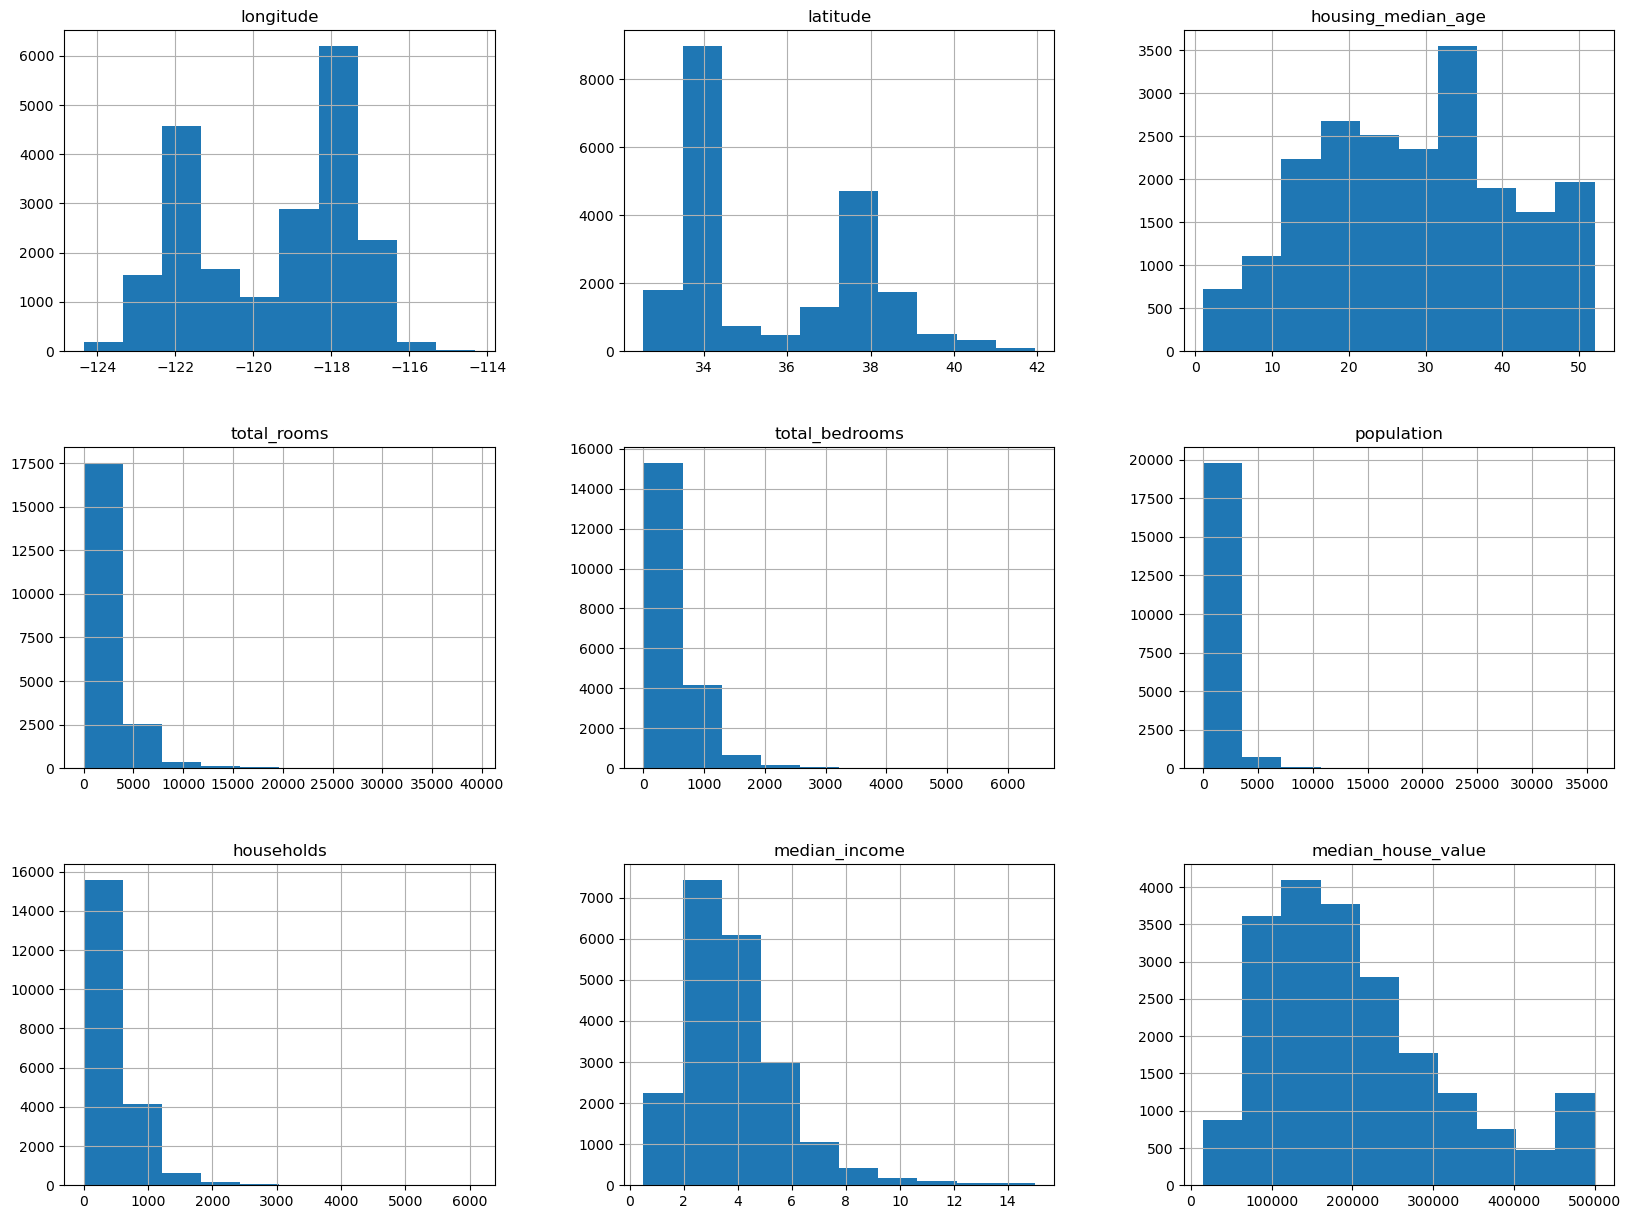

In [7]:
data.hist(figsize=(20,15))
plt.show()

In [8]:
train_set , test_set = train_test_split(data,test_size=0.2,random_state=42)
print(train_set.shape)
train_set.head()

(16512, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [9]:
data = train_set.copy()

# Data Visualation

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

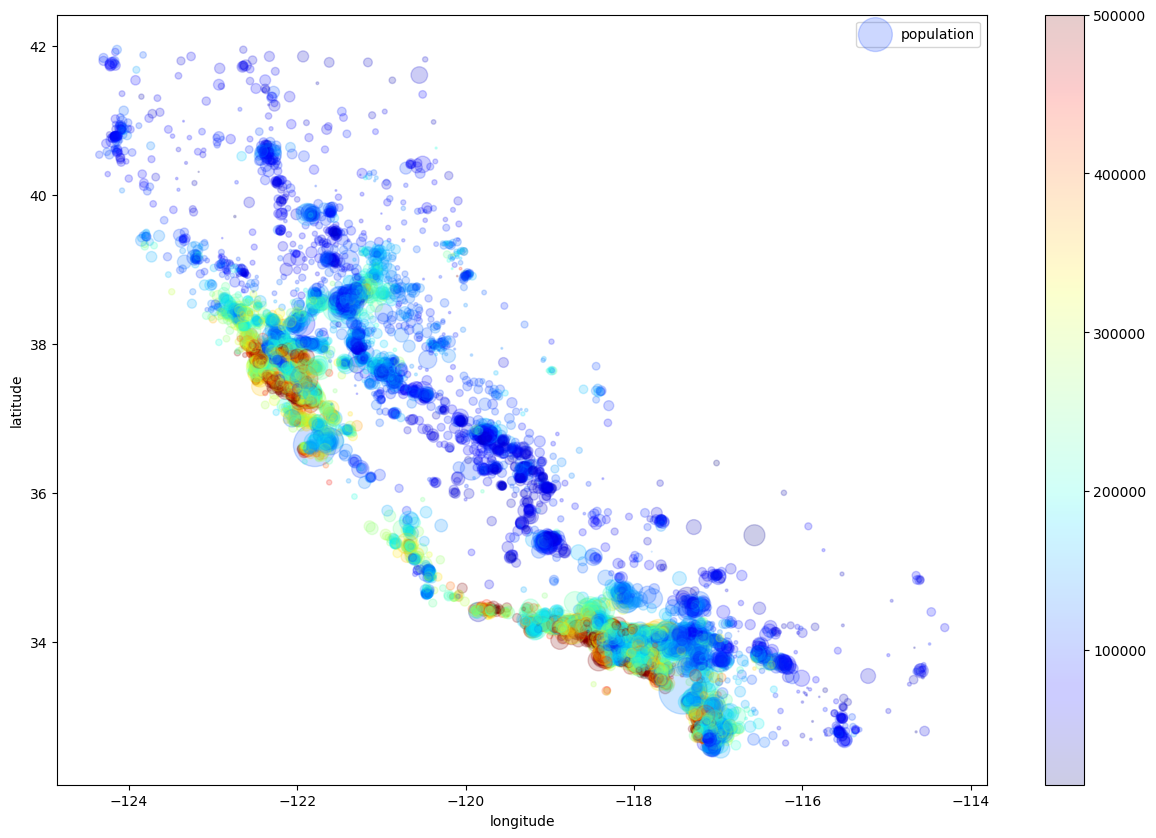

In [10]:
data.plot(kind='scatter',x='longitude',y='latitude'
          ,figsize=(15,10),alpha=0.2,
          s=data['population']/30,label='population',
          c=data['median_house_value'], cmap=plt.get_cmap('jet')) 

#corrlection

In [11]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

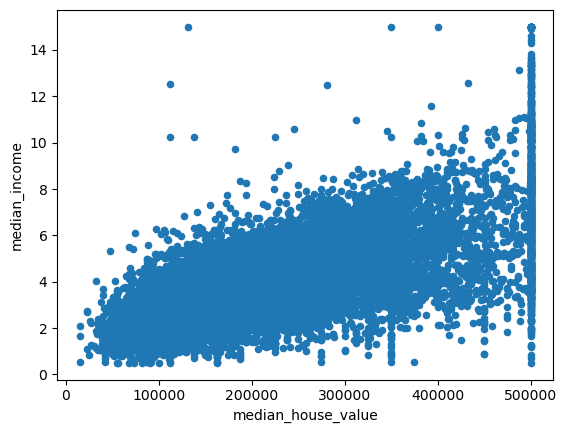

In [12]:
data.plot(kind='scatter',x='median_house_value',y='median_income')

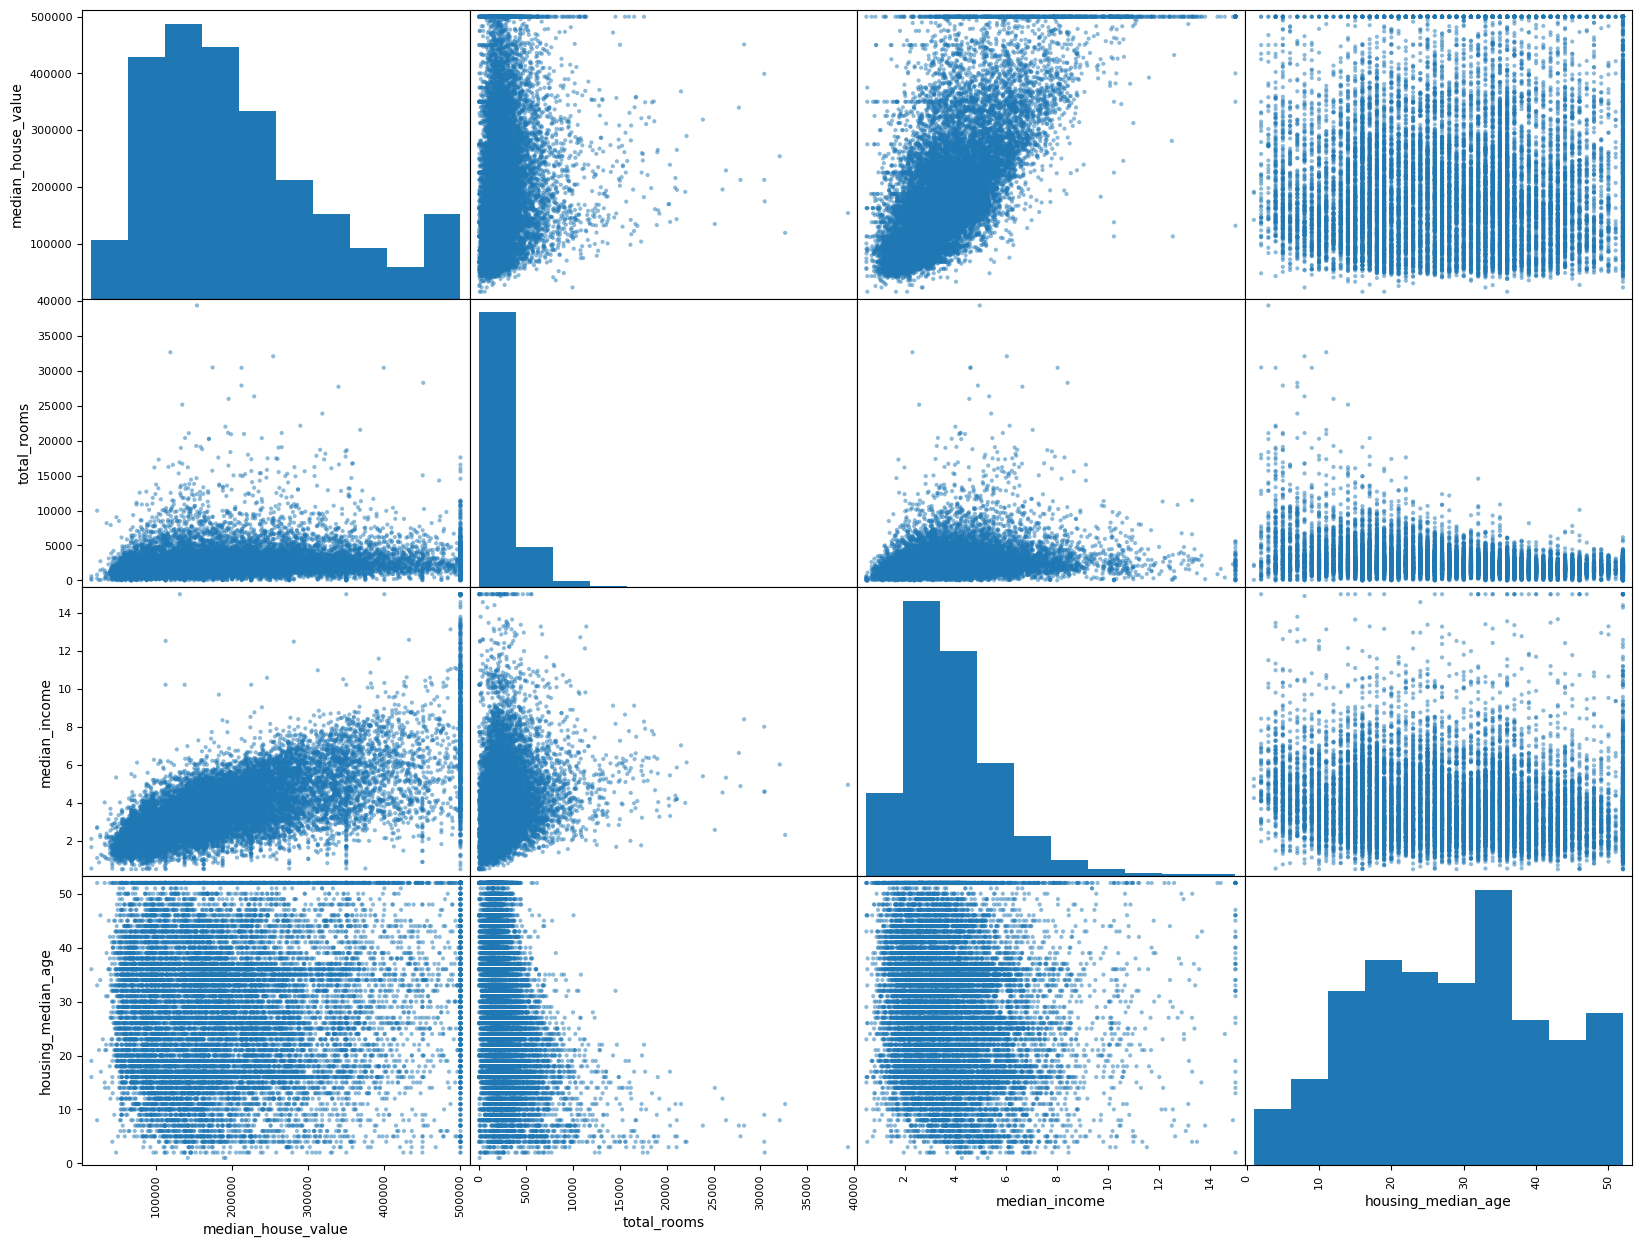

In [13]:
featurs = ['median_house_value','total_rooms','median_income','housing_median_age']
scatter_matrix(data[featurs],figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

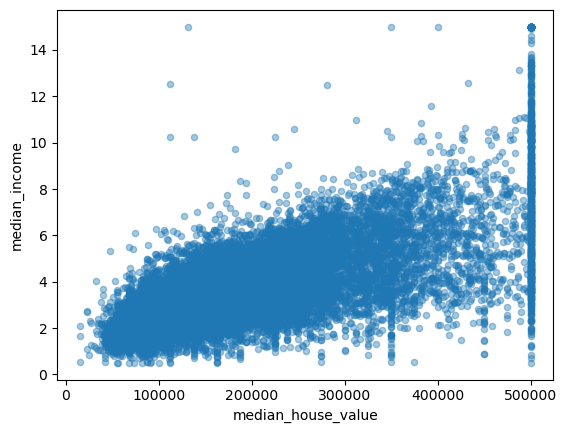

In [14]:
data.plot(x='median_house_value',y='median_income',kind='scatter',alpha=0.4)

In [15]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [16]:
data['total_rooms per total_bedrooms'] =data['total_bedrooms'] /data['total_rooms']
data["totalrooms_per_households"] = data["total_rooms"] / data ['households'] 
data['population per households' ] = data['population']/ data['households']
data. head (10) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms per total_bedrooms,totalrooms_per_households,population per households
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,0.200576,5.017657,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,0.232703,4.473545,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,0.174486,5.645833,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,0.258269,4.002817,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,0.180940,6.268421,2.300000
17848,-121.86,37.42,20.0,5032.0,808.0,2695.0,801.0,6.6227,264800.0,<1H OCEAN,0.160572,6.282147,3.364544
6252,-117.97,34.04,28.0,1686.0,417.0,1355.0,388.0,2.5192,157300.0,<1H OCEAN,0.247331,4.345361,3.492268
9389,-122.53,37.91,37.0,2524.0,398.0,999.0,417.0,7.9892,500001.0,NEAR BAY,0.157686,6.052758,2.395683
6113,-117.90,34.13,5.0,1126.0,316.0,819.0,311.0,1.5000,139800.0,<1H OCEAN,0.280639,3.620579,2.633441
6061,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266,315600.0,<1H OCEAN,0.153130,6.730284,3.394671


In [17]:
corr_matrix=data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value                1.000000
median_income                     0.690647
totalrooms_per_households         0.158485
total_rooms                       0.133989
housing_median_age                0.103706
households                        0.063714
total_bedrooms                    0.047980
population per households        -0.022030
population                       -0.026032
longitude                        -0.046349
latitude                         -0.142983
total_rooms per total_bedrooms   -0.257419
Name: median_house_value, dtype: float64

In [18]:
data2 = train_set.copy()

In [19]:
data2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


# cleaning

fix nan values 

In [21]:
df_label = data2.drop('median_house_value',axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [22]:
df_label.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


In [23]:
data2['total_rooms per total_bedrooms'] = data['total_rooms per total_bedrooms']
data2['totalrooms_per_households'] = data['totalrooms_per_households']
data2['population per households'] = data['population per households']
data2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms per total_bedrooms,totalrooms_per_households,population per households
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,0.200576,5.017657,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,0.232703,4.473545,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,0.174486,5.645833,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,0.258269,4.002817,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,0.180940,6.268421,2.300000


In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       16512 non-null  float64
 1   latitude                        16512 non-null  float64
 2   housing_median_age              16512 non-null  float64
 3   total_rooms                     16512 non-null  float64
 4   total_bedrooms                  16512 non-null  float64
 5   population                      16512 non-null  float64
 6   households                      16512 non-null  float64
 7   median_income                   16512 non-null  float64
 8   median_house_value              16512 non-null  float64
 9   ocean_proximity                 16512 non-null  object 
 10  total_rooms per total_bedrooms  16512 non-null  float64
 11  totalrooms_per_households       16512 non-null  float64
 12  population per households   

scale 

In [25]:
from sklearn.preprocessing import StandardScaler
data3 = data2.drop('ocean_proximity',axis=1)
feature_scale=StandardScaler()
feature_scale = pd.DataFrame(feature_scale.fit_transform(data3),columns=data3.columns)
feature_scale.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms per total_bedrooms,totalrooms_per_households,population per households
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.901189,-0.211785,-0.174916,0.051376
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,1.512771,0.342185,-0.402835,-0.117362
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,-0.299213,-0.661658,0.088216,-0.032280
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.984220,0.783032,-0.600015,0.077507
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,-0.957408,-0.550364,0.349007,-0.068832


one hot encoder

In [26]:
from sklearn.preprocessing import OneHotEncoder


In [27]:
data2.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms per total_bedrooms,totalrooms_per_households,population per households
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,0.200576,5.017657,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,0.232703,4.473545,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,0.174486,5.645833,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,0.258269,4.002817,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,0.180940,6.268421,2.300000


In [29]:
encoder = OneHotEncoder(sparse=0)
data_encod = encoder.fit_transform(data2[['ocean_proximity']])
data_encod = pd.DataFrame(data_encod)
data_encod.columns = encoder.get_feature_names(['prox'])
data_encod.head()
final = pd.concat([data_encod,feature_scale.drop('median_house_value',axis=1)],axis=1)
final.head()

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_rooms per total_bedrooms,totalrooms_per_households,population per households
0,0.0,0.0,0.0,0.0,1.0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.211785,-0.174916,0.051376
1,0.0,0.0,0.0,0.0,1.0,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,0.342185,-0.402835,-0.117362
2,0.0,0.0,0.0,0.0,1.0,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,-0.661658,0.088216,-0.032280
3,0.0,0.0,0.0,0.0,1.0,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,0.783032,-0.600015,0.077507
4,0.0,1.0,0.0,0.0,0.0,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,-0.550364,0.349007,-0.068832


In [34]:
final_data = pd.concat([final,data['median_house_value']],axis=1)
final_data.head()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19838 entries, 0 to 16850
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   prox_<1H OCEAN                  16512 non-null  float64
 1   prox_INLAND                     16512 non-null  float64
 2   prox_ISLAND                     16512 non-null  float64
 3   prox_NEAR BAY                   16512 non-null  float64
 4   prox_NEAR OCEAN                 16512 non-null  float64
 5   longitude                       16512 non-null  float64
 6   latitude                        16512 non-null  float64
 7   housing_median_age              16512 non-null  float64
 8   total_rooms                     16512 non-null  float64
 9   total_bedrooms                  16512 non-null  float64
 10  population                      16512 non-null  float64
 11  households                      16512 non-null  float64
 12  median_income                   

In [50]:
features = final_data.drop('median_house_value',axis=1)
features2=features.dropna()
#features.info()
target = final_data['median_house_value']
target.info()


<class 'pandas.core.series.Series'>
Int64Index: 19838 entries, 0 to 16850
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 826.0 KB


In [51]:
target.isnull().sum()
target2 = target.dropna()
target2.info()

<class 'pandas.core.series.Series'>
Int64Index: 16512 entries, 1 to 16850
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


# Learn And Predect

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg,features2,target2,scoring='neg_mean_squared_error',cv=10)
scores = np.sqrt(-scores)
scores
scores.mean()

116098.9416866964

In [63]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(features2,target2)

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(features2,target2)
scores = cross_val_score(forest,features2,target2,scoring='neg_mean_squared_error',cv=10)
scores = np.sqrt(-scores)
scores.mean()

